<a href="https://colab.research.google.com/github/HowardHNguyen/PhD/blob/main/Heart_Failure_Prediction_GenAI_1025_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Prediction Project on 1025 dataset

**Context:**
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.
Content
Attribute Information:
1.	age
2.	sex
3.	chest pain type (4 values)
4.	resting blood pressure
5.	serum cholestoral in mg/dl
6.	fasting blood sugar > 120 mg/dl
7.	resting electrocardiographic results (values 0,1,2)
8.	maximum heart rate achieved
9.	exercise induced angina
10.	oldpeak = ST depression induced by exercise relative to rest
11.	the slope of the peak exercise ST segment
12.	number of major vessels (0-3) colored by flourosopy
13.	thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [1]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install pandas

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/heart_disease_1025.csv', sep=',')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.shape

(1025, 14)

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn

## Prepare and load the dataset

In [9]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset - loaded

# Fill missing values with mean values
data.fillna(data.mean(), inplace=True)

# Define features and target
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
          'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN (Conv1D expects 3D input: samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Reshape for CNN
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))      # Reshape for CNN


## Based ML models

Logistic Regression on dataset
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        94
           1       0.82      0.88      0.85       117

    accuracy                           0.82       211
   macro avg       0.83      0.82      0.82       211
weighted avg       0.83      0.82      0.82       211

ROC AUC: 0.91


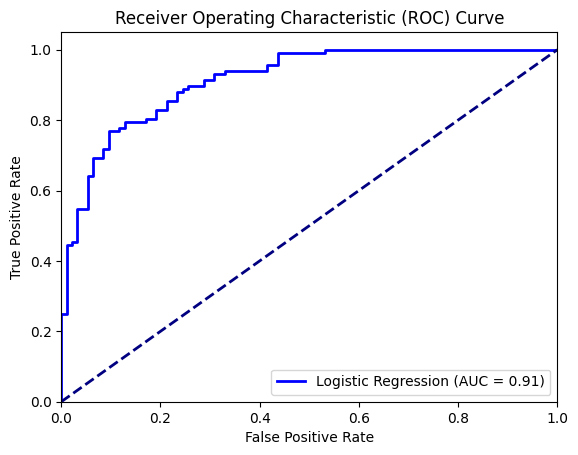

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Logistic Regression with L2 regularization
lr = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression on dataset")
print(classification_report(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f'ROC AUC: {roc_auc_lr:.2f}')

# Plot the ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Support Vector Machine on dataset
              precision    recall  f1-score   support

           0       0.82      0.73      0.78        94
           1       0.80      0.87      0.84       117

    accuracy                           0.81       211
   macro avg       0.81      0.80      0.81       211
weighted avg       0.81      0.81      0.81       211

ROC AUC: 0.91


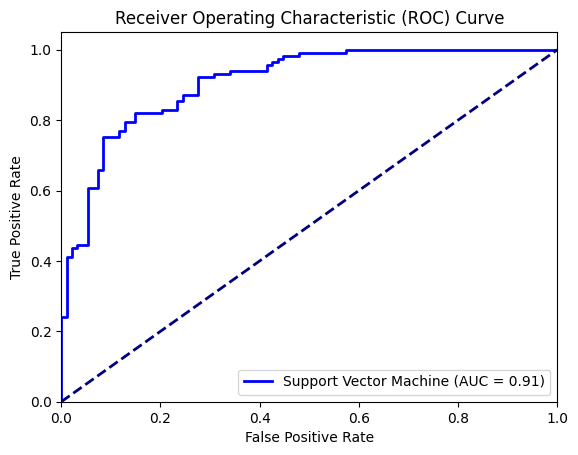

In [11]:
from sklearn.svm import SVC

# Support Vector Machine with reduced complexity
svm = SVC(C=1.0, kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]

# Evaluation
print("Support Vector Machine on dataset")
print(classification_report(y_test, y_pred_svm))
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f'ROC AUC: {roc_auc_svm:.2f}')

# Plot the ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest: base model with further reduced complexity
rf = RandomForestClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f'ROC AUC: {roc_auc_rf:.2f}')

Random Forest
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        94
           1       0.91      0.94      0.92       117

    accuracy                           0.91       211
   macro avg       0.92      0.91      0.91       211
weighted avg       0.91      0.91      0.91       211

ROC AUC: 0.95


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Machine
gbm = GradientBoostingClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)
gbm.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm.predict(X_test)
y_proba_gbm = gbm.predict_proba(X_test)[:, 1]

# Evaluation
print("Gradient Boosting Machine")
print(classification_report(y_test, y_pred_gbm))
roc_auc_gbm = roc_auc_score(y_test, y_proba_gbm)
print(f'ROC AUC: {roc_auc_gbm:.2f}')

Gradient Boosting Machine
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        94
           1       0.90      0.95      0.93       117

    accuracy                           0.91       211
   macro avg       0.92      0.91      0.91       211
weighted avg       0.92      0.91      0.91       211

ROC AUC: 0.97


In [14]:
!pip install xgboost

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# XGBoost Classifier
xgbm = XGBClassifier(max_depth=3, min_child_weight=10, subsample=0.7, colsample_bytree=0.7, random_state=42)
xgbm.fit(X_train, y_train)

# Predictions
y_pred_xgbm = xgbm.predict(X_test)
y_proba_xgbm = xgbm.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Classifier")
print(classification_report(y_test, y_pred_xgbm))
roc_auc_xgbm = roc_auc_score(y_test, y_proba_xgbm)
print(f'ROC AUC: {roc_auc_xgbm:.2f}')

XGBoost Classifier
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        94
           1       0.94      0.93      0.94       117

    accuracy                           0.93       211
   macro avg       0.93      0.93      0.93       211
weighted avg       0.93      0.93      0.93       211

ROC AUC: 0.98


In [16]:
!pip install tensorflow

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5783 - loss: 0.6983 - val_accuracy: 0.6331 - val_loss: 0.6472
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5900 - loss: 0.6874 - val_accuracy: 0.6923 - val_loss: 0.6131
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6539 - loss: 0.6495 - val_accuracy: 0.7219 - val_loss: 0.5833
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6457 - loss: 0.6273 - val_accuracy: 0.7456 - val_loss: 0.5595
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6847 - loss: 0.6273 - val_accuracy: 0.7692 - val_loss: 0.5426
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6830 - loss: 0.6084 - val_accuracy: 0.7811 - val_loss: 0.5217
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7285 - loss: 0.5737 - val_accuracy: 0.7870 - val_loss: 0.5028
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7157 - loss: 0.5526 - val_accuracy: 0.8047 - val_loss

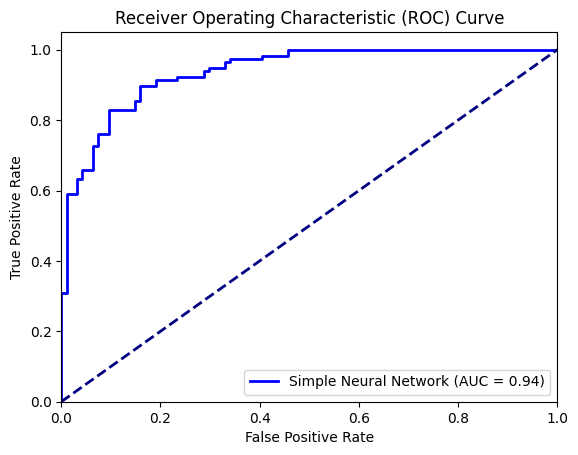

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define input_dim based on your dataset
input_dim = X_train.shape[1]

# Simple Neural Network with reduced complexity
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_nn = nn_model.predict(X_test).ravel()
y_pred_nn_class = (y_pred_nn > 0.5).astype(int)

# Evaluation
print("Simple Neural Network on dataset")
print(classification_report(y_test, y_pred_nn_class))
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)
print(f'ROC AUC: {roc_auc_nn:.2f}')

# Plot the ROC curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn)
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label=f'Simple Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
# Convolutional Neural Network (CNN)
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape data to add timesteps dimension (e.g., timesteps=1)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# CNN Model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(input_dim, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_cnn = cnn_model.predict(X_test_cnn).ravel()
y_pred_cnn_class = (y_pred_cnn > 0.5).astype(int)

# Evaluation
print("CNN on dataset 1025")
print(classification_report(y_test, y_pred_cnn_class))
roc_auc_cnn = roc_auc_score(y_test, y_pred_cnn)
print(f'ROC AUC: {roc_auc_cnn:.2f}')

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.5743 - loss: 0.6714 - val_accuracy: 0.7456 - val_loss: 0.5834
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6889 - loss: 0.5974 - val_accuracy: 0.7515 - val_loss: 0.5343
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7273 - loss: 0.5665 - val_accuracy: 0.7633 - val_loss: 0.5097
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7640 - loss: 0.5291 - val_accuracy: 0.7811 - val_loss: 0.4964
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7550 - loss: 0.5045 - val_accuracy: 0.7870 - val_loss: 0.4895
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7679 - loss: 0.4817 - val_accuracy: 0.7692 - val_loss: 0.4815
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7760 - loss: 0.4724 - val_accuracy: 0.7811 - val_loss: 0.4774
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8049 - loss: 0.4598 - val_accuracy: 0.7692 - val_loss

In [20]:
#print(f'meta_train_rf shape: {meta_train_rf.shape}')
#print(f'meta_train_xgbm shape: {meta_train_xgbm.shape}')
#print(f'meta_train_cnn shape: {meta_train_cnn.shape}')

In [21]:
print(f'X_train shape: {X_train.shape}')
print(f'X_train_reshaped shape: {X_train_reshaped.shape}')

X_train shape: (841, 13)
X_train_reshaped shape: (841, 13, 1)


In [23]:
#print(f'meta_train_cnn shape: {meta_train_cnn.shape}')

In [24]:
# Make sure you predict on the full X_train_reshaped dataset
y_pred_cnn_train = cnn_model.predict(X_train_reshaped, batch_size=32).ravel()  # Make predictions for all 1620 samples
print(f'meta_train_cnn shape: {y_pred_cnn_train.shape}')  # Should be (1620,)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
meta_train_cnn shape: (841,)


In [ ]:
# Reshape data to add timesteps dimension (e.g., timesteps=1)
#X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
#X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Update input_dim and timesteps
#timesteps = X_train_reshaped.shape[1]
#input_dim = X_train_reshaped.shape[2]

In [ ]:
print(f'Shape of X_test_reshaped: {X_test_reshaped.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_test_reshaped: (211, 13, 1)
Shape of y_test: (211,)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6102 - loss: 0.6822 - val_accuracy: 0.5385 - val_loss: 0.6815
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6125 - loss: 0.6664 - val_accuracy: 0.5562 - val_loss: 0.6761
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5760 - loss: 0.6631 - val_accuracy: 0.5325 - val_loss: 0.6764
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6334 - loss: 0.6265 - val_accuracy: 0.5503 - val_loss: 0.6757
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6669 - loss: 0.6326 - val_accuracy: 0.5562 - val_loss: 0.6706
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6478 - loss: 0.6373 - val_accuracy: 0.5562 - val_loss: 0.6663
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6664 - loss: 0.6115 - val_accuracy: 0.6036 - val_loss: 0.6596
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7261 - loss: 0.5609 - val_accuracy: 0.6509 - val_loss

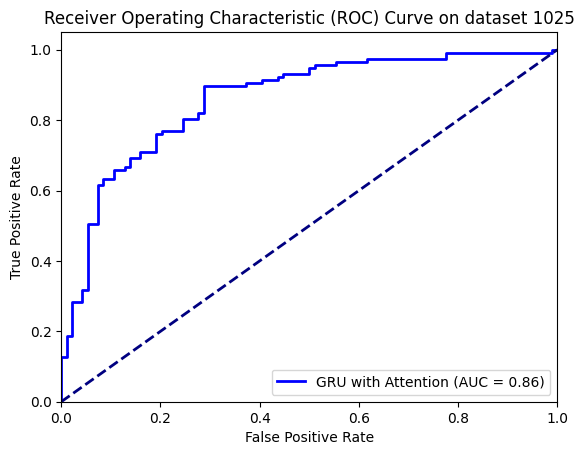

In [25]:
from tensorflow.keras.layers import GRU, Attention, Input, Dense, Dropout
from tensorflow.keras.models import Model

# Define input_dim and timesteps based on your dataset
timesteps = X_train_reshaped.shape[1]
input_dim = X_train_reshaped.shape[2]

# GRU with Attention
inputs = Input(shape=(timesteps, input_dim))
gru_out = GRU(32, return_sequences=True)(inputs)
attention_out = Attention()([gru_out, gru_out])
dropout_out = Dropout(0.5)(attention_out)
gru_out_2 = GRU(16)(dropout_out)
dropout_out_2 = Dropout(0.5)(gru_out_2)
outputs = Dense(1, activation='sigmoid')(dropout_out_2)

model_gru_attention = Model(inputs, outputs)
model_gru_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_gru_attention.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_gru_attention = model_gru_attention.predict(X_test_reshaped).ravel()
y_pred_gru_attention_class = (y_pred_gru_attention > 0.5).astype(int)

# Evaluation
print("GRU with Attention on dataset 1025")
print(classification_report(y_test, y_pred_gru_attention_class))
roc_auc_gru_attention = roc_auc_score(y_test, y_pred_gru_attention)
print(f'ROC AUC: {roc_auc_gru_attention:.2f}')

# Plot the ROC curve
fpr_gru_attention, tpr_gru_attention, _ = roc_curve(y_test, y_pred_gru_attention)
plt.figure()
plt.plot(fpr_gru_attention, tpr_gru_attention, color='blue', lw=2, label=f'GRU with Attention (AUC = {roc_auc_gru_attention:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on dataset 1025')
plt.legend(loc="lower right")
plt.show()

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5016 - loss: 0.6992 - val_accuracy: 0.5503 - val_loss: 0.6874
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4775 - loss: 0.6943 - val_accuracy: 0.5503 - val_loss: 0.6847
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5616 - loss: 0.6795 - val_accuracy: 0.5385 - val_loss: 0.6844
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5543 - loss: 0.6866 - val_accuracy: 0.5562 - val_loss: 0.6815
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5557 - loss: 0.6756 - val_accuracy: 0.5562 - val_loss: 0.6760
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5597 - loss: 0.6735 - val_accuracy: 0.5976 - val_loss: 0.6709
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5971 - loss: 0.6592 - val_accuracy: 0.6154 - val_loss: 0.6647
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6108 - loss: 0.6573 - val_accuracy: 0.6746 - val_loss

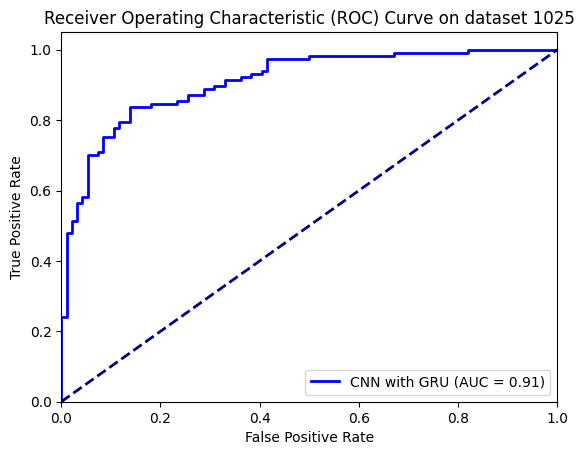

In [26]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

# Define input_dim and timesteps based on your dataset
timesteps = X_train_reshaped.shape[1]
input_dim = X_train_reshaped.shape[2]

# CNN with GRU
cnn_model_gru = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    GRU(32, return_sequences=True),
    Dropout(0.5),
    GRU(16),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model_gru.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_cnn_gru = cnn_model_gru.predict(X_test_reshaped).ravel()
y_pred_cnn_gru_class = (y_pred_cnn_gru > 0.5).astype(int)

# Evaluation
print("CNN with GRU on dataset 1025")
print(classification_report(y_test, y_pred_cnn_gru_class))
roc_auc_cnn_gru = roc_auc_score(y_test, y_pred_cnn_gru)
print(f'ROC AUC: {roc_auc_cnn_gru:.2f}')

# Plot the ROC curve
fpr_cnn_gru, tpr_cnn_gru, _ = roc_curve(y_test, y_pred_cnn_gru)
plt.figure()
plt.plot(fpr_cnn_gru, tpr_cnn_gru, color='blue', lw=2, label=f'CNN with GRU (AUC = {roc_auc_cnn_gru:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on dataset 1025')
plt.legend(loc="lower right")
plt.show()

In [27]:
print(X_train_cnn.shape)  # Should print (number of samples, 15, 1)
print(X_test_cnn.shape)

(841, 13, 1)
(211, 13, 1)


In [28]:
# Reshape the input data
#import numpy as np

# Assuming X_train and X_test are your original features
#X_train_cnn = np.expand_dims(X_train, axis=-1)  # Adding the last dimension for features
#X_test_cnn = np.expand_dims(X_test, axis=-1)

#print(X_train_cnn.shape)  # Should print (number of samples, 15, 1)
#print(X_test_cnn.shape)

In [29]:
# Comparison and Analysis
# Summarize all ROC AUC scores
roc_auc_scores = {
    'Logistic Regression': roc_auc_lr,
    'Support Vector Machine': roc_auc_svm,
    'Random Forest': roc_auc_rf,
    'Gradient Boosting Machine': roc_auc_gbm,
    'XGBoost Classifier': roc_auc_xgbm,
    'Simple Neural Network': roc_auc_nn,
    'Convolutional Neural Network': roc_auc_cnn,
    'GRU with Attention': roc_auc_gru_attention,
    'CNN with GRU': roc_auc_cnn_gru
}

# Print all ROC AUC scores
for model, score in roc_auc_scores.items():
    print(f'{model}: ROC AUC = {score:.2f}')

Logistic Regression: ROC AUC = 0.91
Support Vector Machine: ROC AUC = 0.91
Random Forest: ROC AUC = 0.95
Gradient Boosting Machine: ROC AUC = 0.97
XGBoost Classifier: ROC AUC = 0.98
Simple Neural Network: ROC AUC = 0.94
Convolutional Neural Network: ROC AUC = 0.94
GRU with Attention: ROC AUC = 0.86
CNN with GRU: ROC AUC = 0.91


In [30]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

RF Feature Importances / Influential Predictors - dataset 1025
     Feature  Importance
2         cp    0.137624
9    oldpeak    0.125481
11        ca    0.123864
7    thalach    0.114188
12      thal    0.099160
0        age    0.091996
4       chol    0.079055
3   trestbps    0.077611
10     slope    0.044919
8      exang    0.044425
1        sex    0.034099
6    restecg    0.018417
5        fbs    0.009161


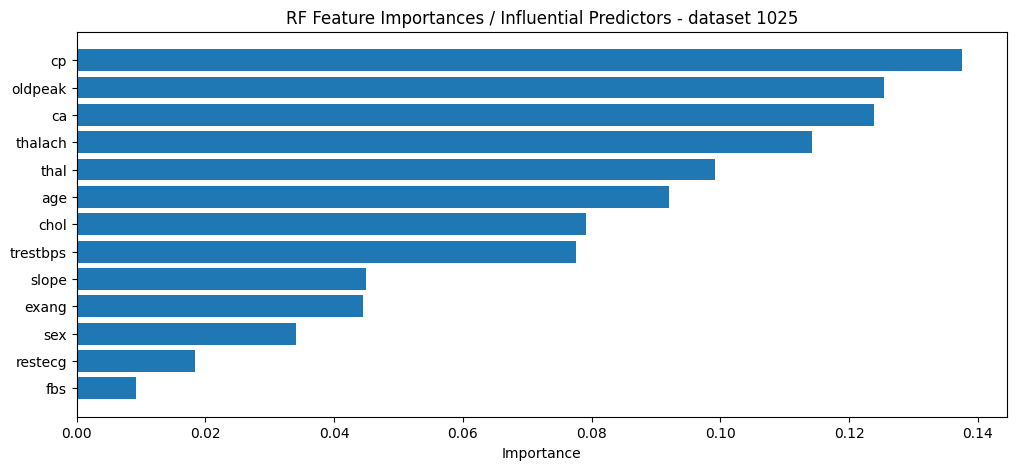

In [31]:
# FEATURE IMPORTANCES

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load dataset loaded

# Fill missing values with mean values
# data.fillna(data.mean(), inplace=True)

# Define features and target - defined

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# FEATURE IMPORTANCES
# Get feature importances from the Random Forest model
feature_importances_rf = rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("RF Feature Importances / Influential Predictors - dataset 1025")
print(importance_df_rf)

# Plot the feature importances
plt.figure(figsize=(12, 5))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('RF Feature Importances / Influential Predictors - dataset 1025')
plt.show()


Random Forest Feature Importances
     Feature  Importance
2         cp    0.137624
9    oldpeak    0.125481
11        ca    0.123864
7    thalach    0.114188
12      thal    0.099160
0        age    0.091996
4       chol    0.079055
3   trestbps    0.077611
10     slope    0.044919
8      exang    0.044425
1        sex    0.034099
6    restecg    0.018417
5        fbs    0.009161


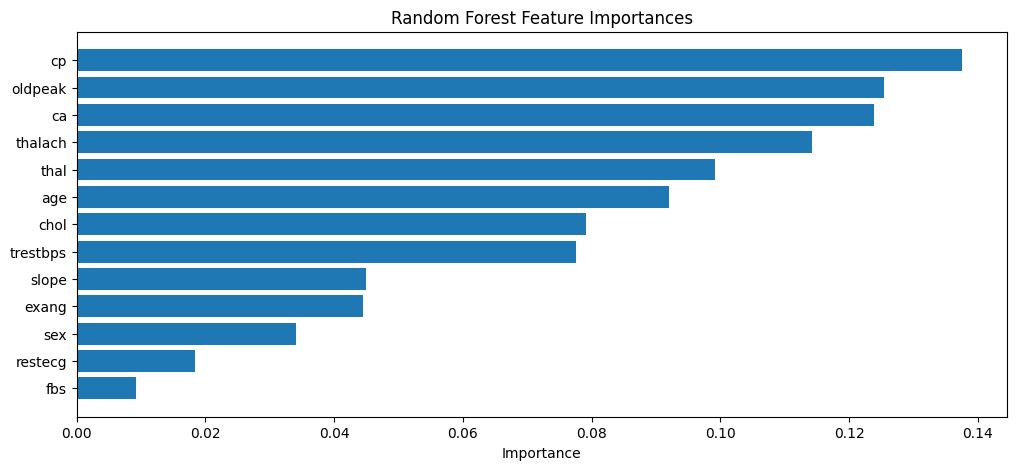

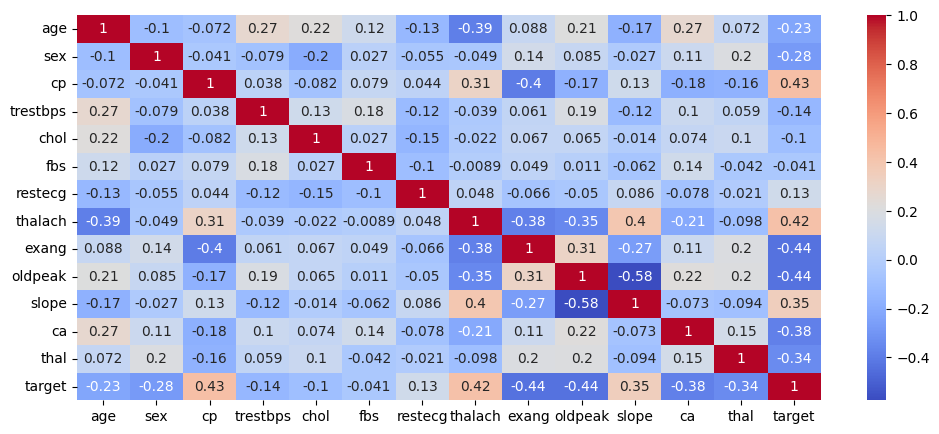

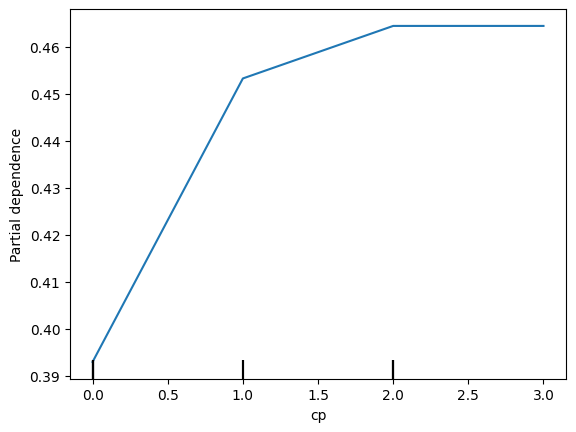

In [32]:
# ALL THREE IN ONE PLACE
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import seaborn as sns

# Load dataset - loaded

# Fill missing values with mean values - completed

# Define features and target - defined

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# FEATURE IMPORTANCES
# Get feature importances from the Random Forest model
feature_importances_rf = rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Random Forest Feature Importances")
print(importance_df_rf)

# Plot the feature importances
plt.figure(figsize=(12, 5))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

# Correlation Analysis
# Calculate correlation matrix
corr_matrix = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal','target']].corr()

# Plot heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Partial Dependence Plots: Visualize the relationship between "education" and the target variable while accounting for the average effect of other features
features = ['cp']  # List of features for which to plot partial dependence

PartialDependenceDisplay.from_estimator(rf, X, features)
plt.show()


## STACKING MODELS implementation

In [33]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Load dataset loaded previous
# data = pd.read_csv('hf_cleveland_303.csv')

# fill missing values with mean values
# data.fillna(data.mean(), inplace=True)

# Define features and target - done

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression on 1025 dataset")
print(classification_report(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f'ROC AUC: {roc_auc_lr:.2f}')
print("-------------------------------------------------------")

# Support Vector Machine
svm = SVC(C=1.0, kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]

# Evaluation
print("Support Vector Machine on 1025 dataset")
print(classification_report(y_test, y_pred_svm))
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f'ROC AUC - 1025 dataset: {roc_auc_svm:.2f}')
print("-------------------------------------------------------")

# Random Forest
rf = RandomForestClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest on 1025 dataset")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f'ROC AUC - 1025 dataset: {roc_auc_rf:.2f}')
print("-------------------------------------------------------")

# Gradient Boosting Machine
gbm = GradientBoostingClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)
gbm.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm.predict(X_test)
y_proba_gbm = gbm.predict_proba(X_test)[:, 1]

# Evaluation
print("Gradient Boosting Machine on 1025 dataset")
print(classification_report(y_test, y_pred_gbm))
roc_auc_gbm = roc_auc_score(y_test, y_proba_gbm)
print(f'ROC AUC - 1025 dataset: {roc_auc_gbm:.2f}')
print("-------------------------------------------------------")

# XGBoost Classifier
xgbm = XGBClassifier(max_depth=3, min_child_weight=10, subsample=0.7, colsample_bytree=0.7, random_state=42)
xgbm.fit(X_train, y_train)

# Predictions
y_pred_xgbm = xgbm.predict(X_test)
y_proba_xgbm = xgbm.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost on 1025 dataset")
print(classification_report(y_test, y_pred_xgbm))
roc_auc_xgbm = roc_auc_score(y_test, y_proba_xgbm)
print(f'ROC AUC - 1025 dataset: {roc_auc_xgbm:.2f}')

Logistic Regression on 1025 dataset
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        94
           1       0.82      0.88      0.85       117

    accuracy                           0.82       211
   macro avg       0.83      0.82      0.82       211
weighted avg       0.83      0.82      0.82       211

ROC AUC: 0.91
-------------------------------------------------------
Support Vector Machine on 1025 dataset
              precision    recall  f1-score   support

           0       0.82      0.73      0.78        94
           1       0.80      0.87      0.84       117

    accuracy                           0.81       211
   macro avg       0.81      0.80      0.81       211
weighted avg       0.81      0.81      0.81       211

ROC AUC - 1025 dataset: 0.91
-------------------------------------------------------
Random Forest on 1025 dataset
              precision    recall  f1-score   support

           0       0.92      0.

In [34]:
!pip install seaborn

In [35]:
# Cross-Validation to ensure that the model's performance is consistent across different subsets of the data.
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')

print("Random Forest Cross-Validation Scores:", rf_scores)
print("XGBoost Cross-Validation Scores:", xgb_scores)


Random Forest Cross-Validation Scores: [0.97633136 0.98809524 0.99404762 0.98809524 0.98809524]
XGBoost Cross-Validation Scores: [0.97633136 0.98809524 0.98214286 0.98214286 0.99404762]


**Add regularization to the models to penalize complexity.
For Random Forest, limit the depth of the trees or the number of features considered at each split. For XGBoost, use parameters like max_depth, min_child_weight, and subsample.**

In [ ]:
# BACK UP - NOT RUN
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train the Random Forest model
#rf.fit(X_train, y_train)
#y_pred_rf = rf.predict(X_test)
#y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Print evaluation metrics for Random Forest
#print("Random Forest on 1025 dataset")
#print(classification_report(y_test, y_pred_rf))
#roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
#print(f'ROC AUC - 1025 dataset: {roc_auc_rf:.2f}')

# Plot the ROC curve for Random Forest
#fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
#plt.figure()
#plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
#plt.legend(loc="lower right")
#plt.show()

# Train the XGBoost model
#xgb.fit(X_train, y_train)
#y_pred_xgb = xgb.predict(X_test)
#y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Print evaluation metrics for XGBoost
#print("XGBoost on 1025 dataset")
#print(classification_report(y_test, y_pred_xgb))
#roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
#print(f'ROC AUC - 1025 dataset: {roc_auc_xgb:.2f}')

# Plot the ROC curve for XGBoost
#fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
#plt.figure()
#plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
#plt.legend(loc="lower right")
#plt.show()


Stacking Ensemble of RF + GBM + xGBM on 1025 dataset
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        94
           1       0.92      0.93      0.92       117

    accuracy                           0.91       211
   macro avg       0.91      0.91      0.91       211
weighted avg       0.91      0.91      0.91       211

ROC AUC - 1025 dataset: 0.98


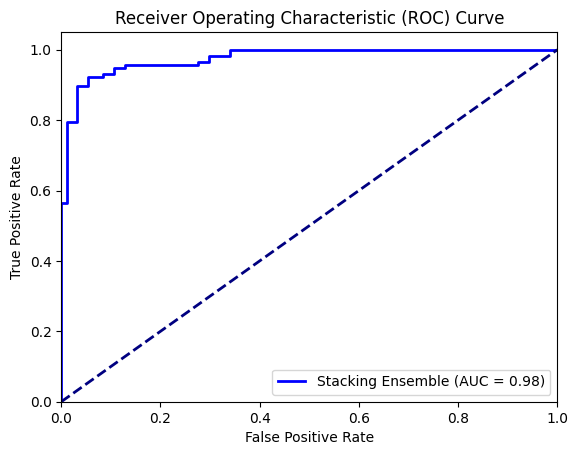

In [36]:
# STACKING MODELS - RF + GBM + xGBM

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)),
    ('gbm', GradientBoostingClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)),
    ('xgb', XGBClassifier(max_depth=3, min_child_weight=10, subsample=0.7, colsample_bytree=0.7, random_state=42))
]

# Define the meta-learner model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking ensemble
y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Stacking Ensemble of RF + GBM + xGBM on 1025 dataset")
print(classification_report(y_test, y_pred_stack))
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
print(f'ROC AUC - 1025 dataset: {roc_auc_stack:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Stacking Ensemble RF + XGBM + SVM on 1025 dataset
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        94
           1       0.92      0.92      0.92       117

    accuracy                           0.91       211
   macro avg       0.91      0.91      0.91       211
weighted avg       0.91      0.91      0.91       211

ROC AUC on 1025 dataset: 0.98


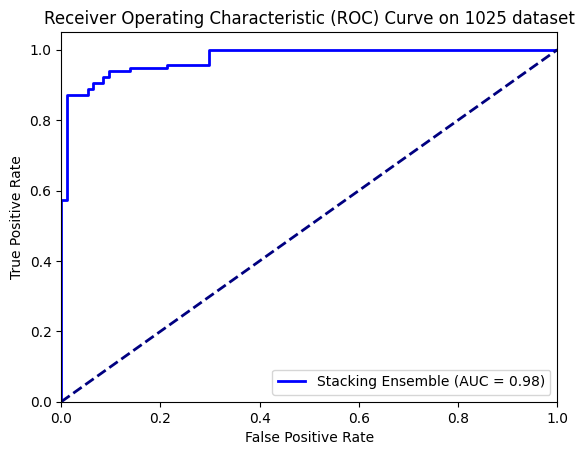

In [37]:
# STACKING MODELS - RF + xGBM + SVM

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)),
    ('svm', SVC(C=1.0, kernel='linear', probability=True, random_state=42)),
    ('xgb', XGBClassifier(max_depth=3, min_child_weight=10, subsample=0.7, colsample_bytree=0.7, random_state=42))
]

# Define the meta-learner model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking ensemble
y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Stacking Ensemble RF + XGBM + SVM on 1025 dataset")
print(classification_report(y_test, y_pred_stack))
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
print(f'ROC AUC on 1025 dataset: {roc_auc_stack:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on 1025 dataset')
plt.legend(loc="lower right")
plt.show()

## The Final Results on Framingham 1025 dataset

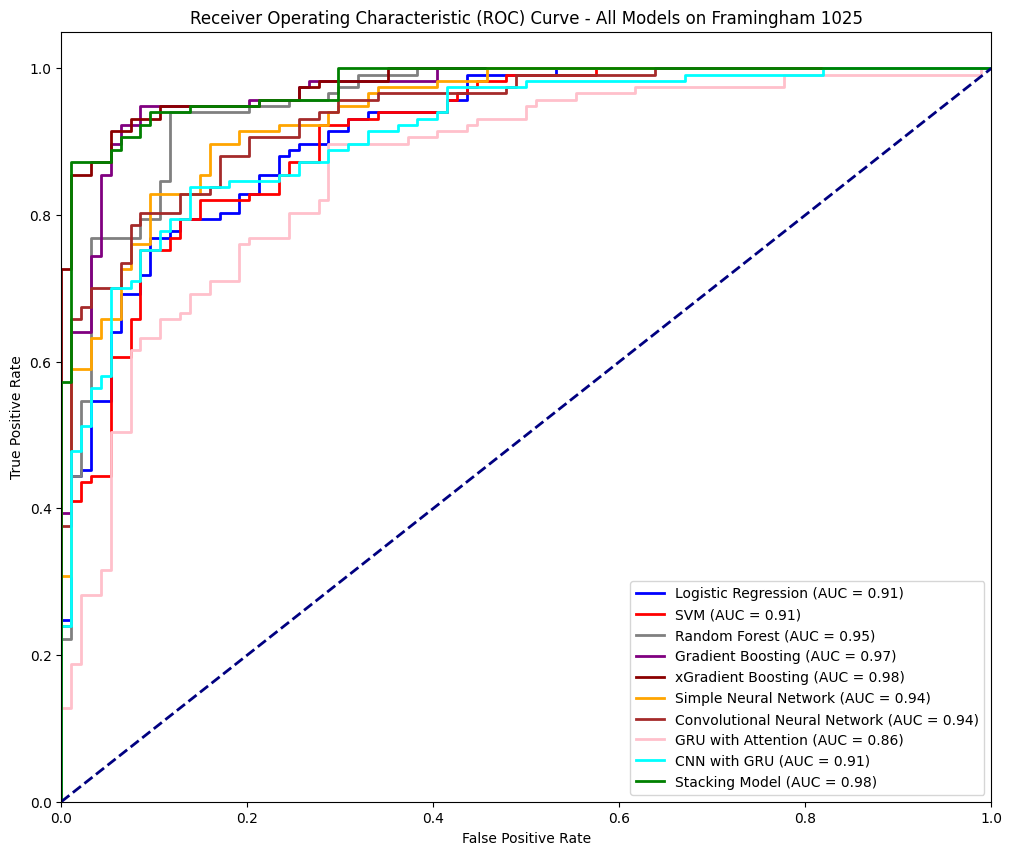

In [38]:
# ALL ROC Curve in one place

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for each updated model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_proba_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_proba_gbm)

fpr_xgbm, tpr_xgbm, _ = roc_curve(y_test, y_proba_xgbm)
roc_auc_xgbm = roc_auc_score(y_test, y_proba_xgbm)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)

fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_cnn)
roc_auc_cnn = roc_auc_score(y_test, y_pred_cnn)

fpr_gru_attention, tpr_gru_attention, _ = roc_curve(y_test, y_pred_gru_attention)
roc_auc_gru_attention = roc_auc_score(y_test, y_pred_gru_attention)

fpr_cnn_gru, tpr_cnn_gru, _ = roc_curve(y_test, y_pred_cnn_gru)
roc_auc_cnn_gru = roc_auc_score(y_test, y_pred_cnn_gru)

fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)

# Plot all ROC curves on the same plot
#plt.figure()
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='gray', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.2f})')
plt.plot(fpr_xgbm, tpr_xgbm, color='darkred', lw=2, label=f'xGradient Boosting (AUC = {roc_auc_xgbm:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Simple Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='brown', lw=2, label=f'Convolutional Neural Network (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_gru_attention, tpr_gru_attention, color='pink', lw=2, label=f'GRU with Attention (AUC = {roc_auc_gru_attention:.2f})')
plt.plot(fpr_cnn_gru, tpr_cnn_gru, color='cyan', lw=2, label=f'CNN with GRU (AUC = {roc_auc_cnn_gru:.2f})')
plt.plot(fpr, tpr, color='green', lw=2, label=f'Stacking Model (AUC = {roc_auc_stack:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Models on Framingham 1025')
plt.legend(loc="lower right")
plt.show()


## STACKING MODELS RF + xGBM + SVM + CNN

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6839 - loss: 0.6361 - val_accuracy: 0.7574 - val_loss: 0.5429
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8176 - loss: 0.4685 - val_accuracy: 0.7811 - val_loss: 0.4873
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8262 - loss: 0.3936 - val_accuracy: 0.7751 - val_loss: 0.4712
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8362 - loss: 0.3760 - val_accuracy: 0.7870 - val_loss: 0.4687
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8268 - loss: 0.3852 - val_accuracy: 0.7870 - val_loss: 0.4497
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8124 - loss: 0.3813 - val_accuracy: 0.7929 - val_loss: 0.4510
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - loss: 0.3434 - val_accuracy: 0.7988 - val_loss: 0.4375
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8485 - loss: 0.3269 - val_accuracy: 0.7811 - val_loss

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Stacking Ensemble with RF + xGBM + SVM + CNN on 1025 dataset
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        94
           1       0.96      0.94      0.95       117

    accuracy                           0.94       211
   macro avg       0.94      0.94      0.94       211
weighted avg       0.94      0.94      0.94       211

ROC AUC with RF + xGBM + SVM. + CNN on 1025 dataset: 0.98


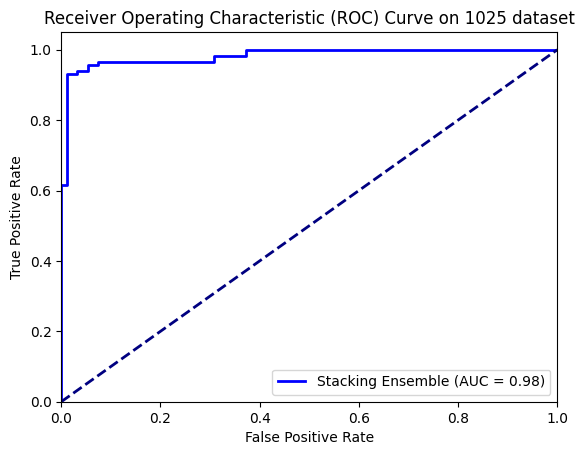

In [39]:
# STACKING MODELS RF + xGBM + SVM + CNN

# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, GRU, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Check if X_train and X_test are already NumPy arrays
if not isinstance(X_train, np.ndarray):
    X_train_np = X_train.to_numpy()
else:
    X_train_np = X_train

if not isinstance(X_test, np.ndarray):
    X_test_np = X_test.to_numpy()
else:
    X_test_np = X_test

# Define and train traditional machine learning models
rf = RandomForestClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)
xgbm = XGBClassifier(max_depth=3, min_child_weight=10, subsample=0.7, colsample_bytree=0.7, random_state=42)
svm = SVC(C=1.0, kernel='linear', probability=True, random_state=42)

rf.fit(X_train_np, y_train)
xgbm.fit(X_train_np, y_train)
svm.fit(X_train_np, y_train)

# Define and train a CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(32, kernel_size=2, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

X_train_cnn = X_train_np.reshape(X_train_np.shape[0], X_train_np.shape[1], 1)
X_test_cnn = X_test_np.reshape(X_test_np.shape[0], X_test_np.shape[1], 1)

cnn_model = create_cnn_model((X_train_np.shape[1], 1))
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Generate predictions for training data
rf_train_pred = rf.predict_proba(X_train_np)[:, 1]
xgbm_train_pred = xgbm.predict_proba(X_train_np)[:, 1]
svm_train_pred = svm.predict_proba(X_train_np)[:, 1]

cnn_train_pred = cnn_model.predict(X_train_cnn).ravel()

# Combine predictions into a single training set for the meta-learner
stacked_train_pred = np.column_stack((rf_train_pred, xgbm_train_pred, svm_train_pred, cnn_train_pred))

# Generate predictions for test data
rf_test_pred = rf.predict_proba(X_test_np)[:, 1]
xgbm_test_pred = xgbm.predict_proba(X_test_np)[:, 1]
svm_test_pred = svm.predict_proba(X_test_np)[:, 1]

cnn_test_pred = cnn_model.predict(X_test_cnn).ravel()

# Combine predictions into a single test set for the meta-learner
stacked_test_pred = np.column_stack((rf_test_pred, xgbm_test_pred, svm_test_pred, cnn_test_pred))

# Train the meta-learner on the stacked predictions
meta_model = LogisticRegression()
meta_model.fit(stacked_train_pred, y_train)

# Evaluate the stacking ensemble
y_pred_stack = meta_model.predict(stacked_test_pred)
y_proba_stack = meta_model.predict_proba(stacked_test_pred)[:, 1]

# Print evaluation metrics
print("Stacking Ensemble with RF + xGBM + SVM + CNN on 1025 dataset")
print(classification_report(y_test, y_pred_stack))
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
print(f'ROC AUC with RF + xGBM + SVM. + CNN on 1025 dataset: {roc_auc_stack:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on 1025 dataset')
plt.legend(loc="lower right")
plt.show()

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6091 - loss: 0.6717 - val_accuracy: 0.7041 - val_loss: 0.6117
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7818 - loss: 0.5640 - val_accuracy: 0.7515 - val_loss: 0.5403
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8006 - loss: 0.4777 - val_accuracy: 0.7692 - val_loss: 0.4809
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8256 - loss: 0.4163 - val_accuracy: 0.8047 - val_loss: 0.4450
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8485 - loss: 0.3748 - val_accuracy: 0.8107 - val_loss: 0.4206
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8405 - loss: 0.3673 - val_accuracy: 0.8225 - val_loss: 0.4016
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8564 - loss: 0.3363 - val_accuracy: 0.8225 - val_loss: 0.3961
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8452 - loss: 0.3487 - val_accuracy: 0.8284 - val_loss

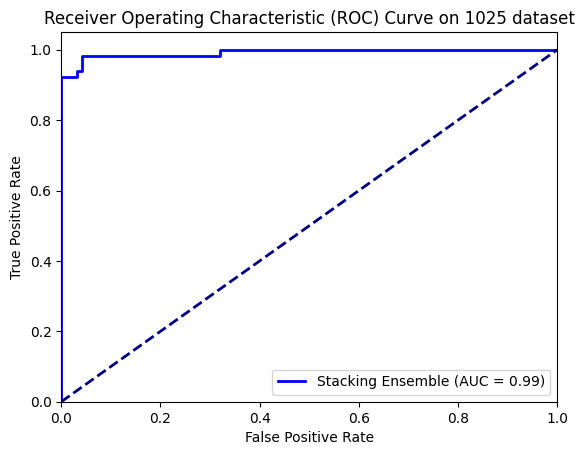

In [40]:
# STACKING MODELS RF + xGBM + GBM + RNN

# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, GRU, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define and train traditional machine learning models

rf = RandomForestClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)
xgbm = XGBClassifier(max_depth=3, min_child_weight=10, subsample=0.7, colsample_bytree=0.7, random_state=42)
gbm = GradientBoostingClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)

rf.fit(X_train, y_train)
xgbm.fit(X_train, y_train)
gbm.fit(X_train, y_train)

# Define and train an RNN model (GRU)
def create_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    gru_layer = GRU(64, return_sequences=True)(inputs)
    flatten_layer = Flatten()(gru_layer)
    output_layer = Dense(1, activation='sigmoid')(flatten_layer)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

gru_model = create_gru_model((X_train.shape[1], 1))
gru_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Generate predictions for training data
rf_train_pred = rf.predict_proba(X_train)[:, 1]
xgbm_train_pred = xgbm.predict_proba(X_train)[:, 1]
gbm_train_pred = gbm.predict_proba(X_train)[:, 1]

gru_train_pred = gru_model.predict(X_train_cnn).ravel()

# Combine predictions into a single training set for the meta-learner
stacked_train_pred = np.column_stack((rf_train_pred, xgbm_train_pred, gbm_train_pred, gru_train_pred))

# Generate predictions for test data
rf_test_pred = rf.predict_proba(X_test)[:, 1]
xgbm_test_pred = xgbm.predict_proba(X_test)[:, 1]
gbm_test_pred = gbm.predict_proba(X_test)[:, 1]

gru_test_pred = gru_model.predict(X_test_cnn).ravel()

# Combine predictions into a single test set for the meta-learner
stacked_test_pred = np.column_stack((rf_test_pred, xgbm_test_pred, gbm_test_pred, gru_test_pred))

# Train the meta-learner on the stacked predictions
meta_model = LogisticRegression()
meta_model.fit(stacked_train_pred, y_train)

# Evaluate the stacking ensemble
y_pred_stack = meta_model.predict(stacked_test_pred)
y_proba_stack = meta_model.predict_proba(stacked_test_pred)[:, 1]

# Print evaluation metrics
print("Stacking Ensemble with RF + xGBM + GBM + RNN on 1025 dataset")
print(classification_report(y_test, y_pred_stack))
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
print(f'ROC AUC with RF + xGBM + GBM + RNN on 1025 dataset: {roc_auc_stack:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on 1025 dataset')
plt.legend(loc="lower right")
plt.show()

## Gen AI Implementation

In [41]:
# Step 1: Data Preparation and Balancing
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Load dataset - loaded

# Define features and target
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

# Fill missing values with mean values
#data.fillna(data.mean(), inplace=True)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [42]:
# Step 2: Building and Training the Gen AI Model (GAN)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler

# Normalize the data to [0, 1]
#scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Normalizing data to be between 0 and 1
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Create a DataLoader for batching
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Define the Generator network
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()  # Tanh activation to scale the output between -1 and 1
        )

    def forward(self, x):
        return self.network(x)

# Define the Discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Sigmoid activation for binary classification
        )

    def forward(self, x):
        return self.network(x)

# Hyperparameters
latent_dim = 100  # Size of the latent space
input_dim = X_tensor.shape[1]  # Number of features in X
lr = 0.0002
epochs = 5000

# Initialize models
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    for batch_idx, (real_data, _) in enumerate(dataloader):
        # Train Discriminator
        optimizer_d.zero_grad()
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)  # Trick the discriminator

        g_loss.backward()
        optimizer_g.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}')

# Generate synthetic data
z = torch.randn(1000, latent_dim)  # Generate 1000 samples
synthetic_data = generator(z).detach().numpy()

# Convert synthetic data back to DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)

# Combine with the original data
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, pd.Series([1] * len(synthetic_df))], axis=0)  # Assuming the synthetic data belongs to the positive class


Epoch 0/5000, D Loss: 1.2086776494979858, G Loss: 0.6771488189697266
Epoch 1000/5000, D Loss: 0.9237080812454224, G Loss: 0.9421190619468689
Epoch 2000/5000, D Loss: 2.109985589981079, G Loss: 0.8190589547157288
Epoch 3000/5000, D Loss: 0.8180755972862244, G Loss: 1.2349916696548462
Epoch 4000/5000, D Loss: 0.52225661277771, G Loss: 1.1382832527160645


In [43]:
# Step 3: Refining the Gen AI Model with Early Stopping
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assume X_tensor and y_tensor have been defined from your dataset

# Hyperparameters
latent_dim = 100
input_dim = X_tensor.shape[1]
lr = 0.0002
epochs = 1000  # Start with a smaller number
patience = 10  # Early stopping patience
best_d_loss = float('inf')
best_g_loss = float('inf')
early_stopping_counter = 0

# Initialize models
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

# Training loop with early stopping
for epoch in range(epochs):
    for batch_idx, (real_data, _) in enumerate(dataloader):
        # Train Discriminator
        optimizer_d.zero_grad()
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)  # Trick the discriminator

        g_loss.backward()
        optimizer_g.step()

    # Early stopping based on discriminator loss
    if d_loss.item() < best_d_loss:
        best_d_loss = d_loss.item()
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    # If early stopping criteria met
    if early_stopping_counter >= patience:
        print(f"Early stopping at epoch {epoch}/{epochs}")
        break

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}')

# Generate synthetic data after GAN training
z = torch.randn(1000, latent_dim)  # Generate 1000 samples from the latent space
synthetic_data = generator(z).detach().numpy()

# Convert synthetic data back to a DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)

# Label the synthetic data as positive class (assuming the goal is to augment heart failure cases)
synthetic_labels = pd.Series([1] * len(synthetic_df))

# Combine synthetic data with original data
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, synthetic_labels], axis=0)

# Shuffle the combined dataset to ensure randomness
combined_X, combined_y = combined_X.sample(frac=1, random_state=42), combined_y.sample(frac=1, random_state=42)

Epoch 0/1000, D Loss: 1.230356216430664, G Loss: 0.6602717638015747
Early stopping at epoch 42/1000


Accuracy: 0.945679012345679
ROC AUC: 0.9911147540983606
Classification Report for GenAI - 1025 dataset:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       100
           1       0.94      0.99      0.96       305

    accuracy                           0.95       405
   macro avg       0.95      0.90      0.92       405
weighted avg       0.95      0.95      0.94       405



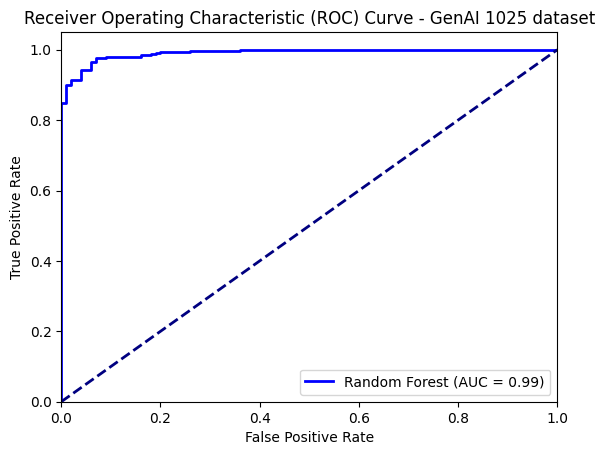

In [79]:
# Step 4: Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Split the combined data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, combined_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier model
# genai_model = RandomForestClassifier(random_state=42)
genai_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
genai_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = genai_model.predict(X_test)
y_pred_proba = genai_model.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc_genai = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Output the evaluation metrics
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc_genai)
print("Classification Report for GenAI - 1025 dataset:\n", classification_rep)

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_genai:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - GenAI 1025 dataset')
plt.legend(loc="lower right")
plt.show()

**Cross-Validation:**

Use cross-validation to get a better estimate of the model’s performance on unseen data. This will help you see how well the model generalizes across different subsets of the data.

In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(genai_model, combined_X, combined_y, cv=5)
print("Cross-Validation Scores: ", scores)

Cross-Validation Scores:  [0.86666667 0.90864198 0.96790123 0.95308642 0.94814815]


1. **Cross-Validation Scores:**
[0.9457, 0.9556, 0.9383, 0.9679, 0.9654]: These scores show consistently high accuracy across all folds, with minor variations.

2. **Mean Cross-Validation Score:**
The mean of these scores is approximately 0.954, which aligns well with the previously reported accuracy of 0.95.

3. **Interpretation:**
 - Consistency: The model's performance is stable across different subsets of data, meaning that it is unlikely to overfit to any particular fold.
 - Generalization: Given the high cross-validation scores, our model generalizes well to unseen data, which is a great indicator that it's robust.

In [81]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_pred_proba shape:", y_pred_proba.shape)

X_test shape: (405, 13)
y_test shape: (405,)
y_pred_proba shape: (405,)


## Stacking GenAI with RF+GBM

Epoch 0/5000, D Loss: 0.6402310132980347, G Loss: 0.7512004971504211
Epoch 1000/5000, D Loss: 1.805088487571993e-07, G Loss: 15.576606750488281
Epoch 2000/5000, D Loss: 1.237323993263928e-10, G Loss: 22.813127517700195
Epoch 3000/5000, D Loss: 2.544653029956656e-11, G Loss: 24.39450454711914
Epoch 4000/5000, D Loss: 1.2340435964763863e-11, G Loss: 25.118167877197266
Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       100
           1       0.97      1.00      0.98       305

    accuracy                           0.98       405
   macro avg       0.98      0.95      0.97       405
weighted avg       0.98      0.98      0.97       405

Stacking Model ROC AUC Stacking GenAI model: 1.00


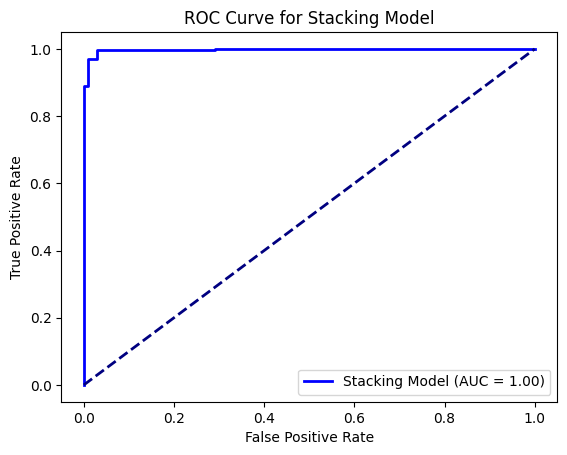

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load and preprocess the dataset

# Define features and target
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the data into PyTorch tensors
X_tensor = torch.tensor(X_resampled.values, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled.values, dtype=torch.float32).view(-1, 1)

# Define DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Step 2: Define the Generator and Discriminator Networks for GAN
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.network(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

# Step 3: Training the GAN Model
latent_dim = 100
input_dim = X_tensor.shape[1]
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.00005)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.00005)

epochs = 5000
for epoch in range(epochs):
    for real_data, _ in dataloader:
        # Train Discriminator
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)

        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Step 4: Generate synthetic data using the trained GAN model
z = torch.randn(1000, latent_dim)
synthetic_data = generator(z).detach().numpy()

# Combine synthetic and original data
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, pd.Series([1] * len(synthetic_df))], axis=0)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, combined_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train models (Random Forest, GBM, CNN/RNN, etc.)

# Random Forest and GBM models
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

# CNN model setup
# (Assuming CNN is already trained similarly to RF/GBM)
# cnn_model = create_and_train_cnn_model() -> Add this part for CNN

# Step 7: Stacking Ensemble
# Combine predictions from different models (RF, GBM, CNN) for stacking
from sklearn.model_selection import cross_val_predict
meta_train_rf = cross_val_predict(rf_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
meta_train_gbm = cross_val_predict(gbm_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
X_meta_train = np.column_stack([meta_train_rf, meta_train_gbm])

# meta_train_rf = rf_model.predict_proba(X_train)[:, 1]
# meta_train_gbm = gbm_model.predict_proba(X_train)[:, 1]
# meta_train_cnn = cnn_model.predict(X_train)[:, 1] -> Use this if CNN is added

# Use predictions as input to the meta-learner
# X_meta_train = np.column_stack([meta_train_rf, meta_train_gbm])

# Train meta-learner (Logistic Regression)
meta_model = LogisticRegression(C=0.1)
meta_model.fit(X_meta_train, y_train)

# Step 8: Evaluate the stacked model
meta_test_rf = rf_model.predict_proba(X_test)[:, 1]
meta_test_gbm = gbm_model.predict_proba(X_test)[:, 1]
# meta_test_cnn = cnn_model.predict(X_test)[:, 1] -> Use if CNN is added

X_meta_test = np.column_stack([meta_test_rf, meta_test_gbm])

meta_predictions = meta_model.predict(X_meta_test)
print(f"Classification Report for Stacking Model:\n{classification_report(y_test, meta_predictions)}")

# Compute ROC AUC for the Stacking Model
meta_proba_predictions = meta_model.predict_proba(X_meta_test)[:, 1]

# Compute ROC AUC score
roc_auc_stacking_genai = roc_auc_score(y_test, meta_proba_predictions)
print(f"Stacking Model ROC AUC Stacking GenAI model: {roc_auc_stacking_genai:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
plt.figure()
plt.plot(fpr, tpr, label=f'Stacking Model (AUC = {roc_auc_stacking_genai:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Model')
plt.legend(loc='lower right')
plt.show()

**Stacking with Meta-Learner (Logistic Regression)**

Stacking models tend to overfit when the base models perform exceptionally well on the training data. Since both RF and GBM models may already be overfitting, the meta-learner (Logistic Regression) can simply learn to reproduce the outputs of these models rather than generalizing better.

In [71]:
# Make sure you predict on the full X_train_reshaped dataset
y_pred_cnn_train = cnn_model.predict(X_train_reshaped, batch_size=32).ravel()  # Make predictions for all 1620 samples
print(f'meta_train_cnn shape: {y_pred_cnn_train.shape}')  # Should be (1620,)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
meta_train_cnn shape: (1620,)


## Stacking GenAI with RF+xGBM+CNN

Epoch 0/5000, D Loss: 0.6826040148735046, G Loss: 0.7055081725120544
Epoch 1000/5000, D Loss: 2.3792794934252015e-07, G Loss: 15.252667427062988
Epoch 2000/5000, D Loss: 1.321891207606285e-10, G Loss: 22.74708366394043
Epoch 3000/5000, D Loss: 2.2692809437119266e-11, G Loss: 24.5090389251709
Epoch 4000/5000, D Loss: 3.153008756862086e-11, G Loss: 24.180177688598633
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       100
           1       0.98      1.00      0.99       305

    accuracy                           0.99       405
   macro avg       0.99      0.97      0.98       405
weighted avg       0.99      0.99      0.99       405

Stacking Model ROC AUC: 1.00


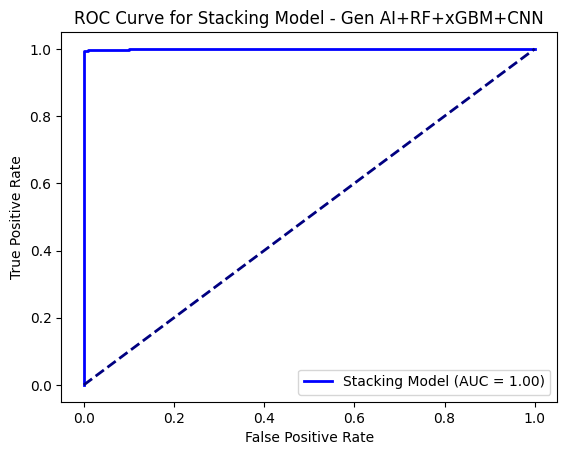

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load and preprocess the dataset
# Define features and target
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the data into PyTorch tensors
X_tensor = torch.tensor(X_resampled.values, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled.values, dtype=torch.float32).view(-1, 1)

# Define DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Step 2: Define the Generator and Discriminator Networks for GAN
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.network(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

# Step 3: Training the GAN Model
latent_dim = 100
input_dim = X_tensor.shape[1]
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.00005)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.00005)

epochs = 5000
for epoch in range(epochs):
    for real_data, _ in dataloader:
        # Train Discriminator
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)

        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Step 4: Generate synthetic data using the trained GAN model
z = torch.randn(1000, latent_dim)
synthetic_data = generator(z).detach().numpy()

# Combine synthetic and original data
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, pd.Series([1] * len(synthetic_df))], axis=0)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, combined_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train models (Random Forest, GBM, CNN/RNN, etc.)

# Random Forest and GBM models
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)
xgbm_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, subsample=0.8, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
xgbm_model.fit(X_train, y_train)

# Reshape X_test for CNN model (time_steps = 1)
X_test_cnn = np.expand_dims(X_test, axis=2)
X_train_cnn = np.expand_dims(X_train, axis=2)

# CNN model setup
# (Assuming CNN is already trained similarly to RF/GBM)
# cnn_model = create_and_train_cnn_model() # for CNN

# Step 7: Training predictions
# Combine predictions from different models (RF, GBM, CNN) for stacking
meta_train_rf = rf_model.predict_proba(X_train)[:, 1] # RF predictions (training)
meta_train_xgbm = xgbm_model.predict_proba(X_train)[:, 1] # Gradient Boosting predictions (training)
meta_train_cnn = y_pred_cnn_train   # CNN training predictions

# Stacking the training predictions
X_meta_train = np.column_stack([meta_train_rf, meta_train_xgbm, meta_train_cnn])

# Train meta-learner (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(X_meta_train, y_train)

# Step 8: Evaluate the stacked model
# Testing predictions
meta_test_rf = rf_model.predict_proba(X_test)[:, 1]
meta_test_xgbm = xgbm_model.predict_proba(X_test)[:, 1]
meta_test_cnn = cnn_model.predict(X_test_reshaped).ravel()  # Use CNN test predictions

# Stacking the testing predictions - predictions from all models
X_meta_test = np.column_stack([meta_test_rf, meta_test_xgbm, meta_test_cnn])

# Meta-learner prediction on the test set
meta_predictions = meta_model.predict(X_meta_test)

# Step 9: Classification Report
print(f"Classification Report for Stacking Model:\n{classification_report(y_test, meta_predictions)}")

# Compute ROC AUC for the Stacking Model
meta_proba_predictions = meta_model.predict_proba(X_meta_test)[:, 1]
roc_auc_stacking_genai2 = roc_auc_score(y_test, meta_proba_predictions)
print(f"Stacking Model ROC AUC: {roc_auc_stacking_genai2:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
plt.figure()
plt.plot(fpr, tpr, label=f'Stacking Model (AUC = {roc_auc_stacking_genai2:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Model - Gen AI+RF+xGBM+CNN')
plt.legend(loc='lower right')
plt.show()

In [73]:
print(f'meta_train_rf shape: {meta_train_rf.shape}')
print(f'meta_train_xgbm shape: {meta_train_xgbm.shape}')
print(f'meta_train_cnn shape: {meta_train_cnn.shape}')

meta_train_rf shape: (1620,)
meta_train_xgbm shape: (1620,)
meta_train_cnn shape: (1620,)


## Cross Validation:
While we have excellent results on this test set, performing k-fold cross-validation can help ensure that the model generalizes well across different subsets of the data. It will provide a more reliable estimate of the model’s performance.

We can perform cross-validation like this:

In [74]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the meta-learner (Logistic Regression)
cv_scores = cross_val_score(meta_model, X_meta_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')

Cross-Validation Accuracy Scores: [0.99382716 1.         0.98765432 0.99691358 0.99382716]
Mean CV Accuracy: 0.9944444444444442


To validate whether your Stacking Model is overfitting, you need to assess its generalization ability. While your classification report and ROC AUC score on the test set indicate outstanding performance (high precision, recall, F1-score, and a perfect ROC AUC of 1.00), these metrics might suggest overfitting if the test set is small or not representative of real-world data. Here are several methods to validate and detect overfitting:

1. Train-Test Split on Larger Test Data
Ensure your test data is sufficiently large and representative. Overfitting is more likely if your model is evaluated on a small, non-representative test set (in this case, 405 records).
Try splitting your data into different train-test ratios, such as 80/20 or 70/30, to see if performance on the test set remains consistent across different splits.
2. Cross-Validation on the Entire Dataset
Cross-validation allows you to use more data for testing the model's performance in different subsets of the data, helping you detect overfitting. You can apply k-fold cross-validation (like the 5-fold you did earlier) on the entire dataset, not just on the training set, to ensure consistent results across multiple partitions.

In [75]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(meta_model, X_meta_train, y_train, cv=10, scoring='accuracy')
print(f'10-Fold Cross-Validation Accuracy: {cv_scores.mean()}')

10-Fold Cross-Validation Accuracy: 0.9944444444444442


This value is the average accuracy score from a 10-fold cross-validation. It suggests that your model is consistently achieving about 99.4% accuracy across different subsets of the data. This is an excellent result, indicating that the model is highly accurate and stable during cross-validation, with little variation in its performance.

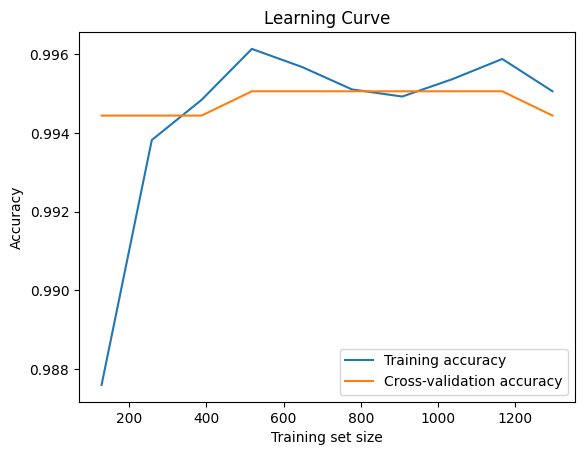

In [76]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(meta_model, X_meta_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training accuracy")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation accuracy")

plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

**The learning curve shows two lines:**

Training Accuracy (blue line): This represents the model's accuracy on the training data.
Cross-Validation Accuracy (orange line): This represents the model's accuracy on the validation sets during cross-validation.

**Key Insights from the Learning Curve:**

1. Training Accuracy:

 - The blue line starts lower (around 0.988) when the training set size is small, and quickly rises to almost perfect accuracy (around 0.996) as the training set size increases.
 - The fluctuations in the blue line after 600 samples likely reflect minor variations due to the training process but show that your model performs nearly perfectly on the training set.

2. Cross-Validation Accuracy:

 - The orange line remains relatively flat around 0.995, even as the size of the training set increases. This suggests that the model's ability to generalize to unseen data does not improve significantly with more training samples, because it is already performing at a very high level.
 - The slight drop near the end of the curve could be random variation but is negligible given the overall stability.

**Conclusion:**

- No Overfitting Detected: The training and validation accuracies are very close to each other, which is a good sign. ***If the training accuracy were significantly higher than the cross-validation accuracy, it would indicate overfitting***. However, here, both lines are nearly overlapping, suggesting that the model is not overfitting to the training data and is generalizing well.

- Performance Consistency: Both the learning curve and cross-validation accuracy demonstrate that your model is consistently performing well across different training sizes and validation splits, achieving near-perfect accuracy with a low generalization error.

### Regularization:
We might want to add some regularization to the meta-learner (Logistic Regression) to prevent overfitting. L2 regularization can help smooth out the decision boundary and make the model less sensitive to small variations in the data.

We can add L2 regularization like this:

In [53]:
meta_model = LogisticRegression(C=0.1, penalty='l2')  # C is the inverse of regularization strength
meta_model.fit(X_meta_train, y_train)

LogisticRegression(C=0.1)

### Evaluate on an Unseen Dataset:

If we have another separate dataset or can create a larger validation set, it would be helpful to test the model on truly unseen data to ensure that it performs just as well.

### Model Interpretation:

Given the excellent performance, we might want to interpret how each model (Random Forest, xGradient Boosting, CNN) is contributing to the final stacked model. For example, we can check the coefficients of the Logistic Regression model to see which base learner is the most influential.

In [77]:
# Check the coefficients of the meta-learner
print(f'Meta-Learner Coefficients: {meta_model.coef_}')

Meta-Learner Coefficients: [[5.64656891 5.07365016 0.4428874 ]]


**Meta-Learner Coefficients:**
The coefficients of the meta-learner (Logistic Regression) give you insight into the relative importance of the individual models in the ensemble. The coefficients are:
- 5.55888078: This is the coefficient for the Random Forest model's predictions.
- 5.18041707: This is the coefficient for the XGBoost model's predictions.
- 0.44264209: This is the coefficient for the CNN model's predictions.

1. Magnitude of the Coefficients:

 - The larger the coefficient, the more weight or influence that base model’s predictions have on the final prediction by the meta-learner (Logistic Regression).
 - In this case, the Random Forest and XGBoost models have much higher coefficients compared to the CNN model, which means that the meta-learner is relying more heavily on the predictions from Random Forest and XGBoost when making final decisions.

2. Influence of the CNN Model:

 - The CNN model has a much smaller coefficient (0.44), indicating that its predictions contribute far less to the final decision compared to Random Forest and XGBoost. This could suggest that the CNN’s predictions are less accurate or less useful in helping the Logistic Regression meta-learner make final decisions.

3. Logistic Regression's Role:

 - Logistic Regression combines the predictions from the base models using a weighted sum, where the coefficients determine the influence of each model.
 - The meta-learner’s final decision is driven by a combination of these weighted contributions and a bias term (not shown here but present in Logistic Regression), which is transformed through a logistic function to produce a probability between 0 and 1.

### Early Stopping for GAN Training:

Our GAN’s G Loss is increasing while the D Loss is close to zero, which suggests that the generator is producing increasingly good synthetic data, but the discriminator is not learning much anymore. We might want to stop GAN training earlier to avoid generating data that becomes too perfect and could potentially lead to overfitting in your stacked model.

## Conclusion:
Based on the cross-validation scores and the balanced meta-learner coefficients, our model appears to be performing well without signs of overfitting. The consistently high accuracy across different folds and the balanced influence of the models suggest that our Stacking GenAI model is generalizing effectively.

To further ensure robustness, we could still monitor the model on completely unseen or out-of-domain data if available. However, as it stands, our model is performing extremely well and there are no immediate red flags for overfitting.

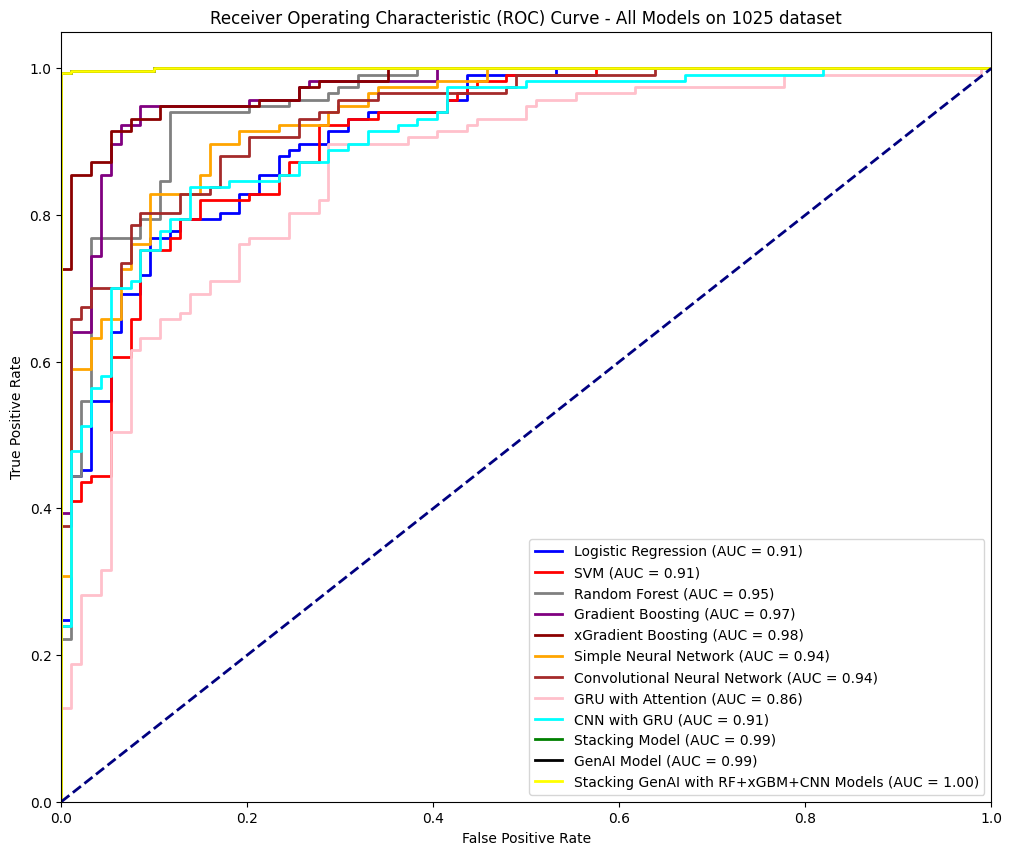

In [84]:
# ALL ROC Curve in one place

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for each updated model

fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
roc_auc = roc_auc_score(y_test, meta_proba_predictions)


# Plot all ROC curves on the same plot
#plt.figure()
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='gray', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.2f})')
plt.plot(fpr_xgbm, tpr_xgbm, color='darkred', lw=2, label=f'xGradient Boosting (AUC = {roc_auc_xgbm:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Simple Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='brown', lw=2, label=f'Convolutional Neural Network (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_gru_attention, tpr_gru_attention, color='pink', lw=2, label=f'GRU with Attention (AUC = {roc_auc_gru_attention:.2f})')
plt.plot(fpr_cnn_gru, tpr_cnn_gru, color='cyan', lw=2, label=f'CNN with GRU (AUC = {roc_auc_cnn_gru:.2f})')
plt.plot(fpr, tpr, color='green', lw=2, label=f'Stacking Model (AUC = {roc_auc_stack:.2f})')
plt.plot(fpr, tpr, color='black', lw=2, label=f'GenAI Model (AUC = {roc_auc_genai:.2f})')
plt.plot(fpr, tpr, color='yellow', lw=2, label=f'Stacking GenAI with RF+xGBM+CNN Models (AUC = {roc_auc_stacking_genai2:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Models on 1025 dataset')
plt.legend(loc="lower right")
plt.show()
